<a href="https://colab.research.google.com/github/YuliaLoburets/ML_learning/blob/main/HW_2_2_%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%BD%D0%B5_%D1%84%D0%BE%D1%80%D0%BC%D1%83%D0%BB%D1%8E%D0%B2%D0%B0%D0%BD%D0%BD%D1%8F_%D0%BB%D0%BE%D0%B3%D1%96%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми реалізуємо логістичну регресію на `numpy`.
Ці завдання допоможуть вам ґрунтовно засвоїти основні концепції логістичної регресії та реалізувати їх на практиці 🔥

#### Завдання 1: Реалізація функції сигмоїди
1. З використанням `numpy` напишіть функцію `sigmoid(z)` для обчислення значення сигмоїди згідно з формулою:
   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$
2. Використовуючи цю функцію, обчисліть значення сигмоїди для наступних даних: $ z = [-2, -1, 0, 1, 2] $. Виведіть результат обчислень.


In [ ]:
import numpy as np

In [ ]:
z = [-2,-1,0,1,2]

In [ ]:
def sigmoid(z):
    z = np.asarray(z)
    results = 1 / (1 + np.exp(-z))
    return results

In [ ]:
print(sigmoid(z))


[0.11920292 0.26894142 0.5        0.73105858 0.88079708]




#### Завдання 2: Реалізація функції гіпотези для логістичної регресії
1. Напишіть функцію `hypothesis(theta, X)`, яка обчислює гіпотезу для логістичної регресії, використовуючи функцію сигмоїди. Формула гіпотези:
   $$
   h_\theta(x) = \sigma(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}
   $$
2. Використайте функцію `hypothesis` для обчислення значень гіпотези для наступних даних:
   
   $\theta = [0.5, -0.5]$
   
   $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  Виведіть результат обчислень.


In [ ]:
theta = np.array([0.5,-0.5])
X = np.array([[1,2],
     [1,-1],
     [1,0],
     [1,1]])
print(theta.shape)
print(X.shape)

(2,)
(4, 2)


In [ ]:
def hypothesis(theta_param, X_param):
  results = 1/(1+np.exp(-np.dot(X_param, theta_param.T)))
  return results

In [ ]:
hypothesis(theta, X)

array([0.37754067, 0.73105858, 0.62245933, 0.5       ])

#### Завдання 3: Реалізація функції для підрахунку градієнтів фукнції втрат
1. Напишіть функцію `compute_gradient(theta, X, y)`, яка обчислює градієнти функції втрат для логістичної регресії. Формула для обчислення градієнта:
   $$
   \frac{\partial L(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left[ (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \right]
   $$
2. Використайте функцію `compute_gradient` для обчислення градієнтів для наступних даних:

  $\theta = [0.5, -0.5]$

  $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  $y = [1, 0, 1, 0]$

  Виведіть результат обчислень.

In [ ]:
theta = np.array([0.5,-0.5])
X = np.array([[1,2],
     [1,-1],
     [1,0],
     [1,1]])
y=np.array([1,0,1,0])


In [ ]:
def compute_gradient(theta_param, X_param, y_param):
  m = X_param.shape[0]
  y_predict = 1/(1+np.exp(-np.dot(X_param, theta_param.T)))
  gradient = 1/m * np.dot(X_param.T,(y_predict-y_param))
  return gradient


In [ ]:
compute_gradient(theta, X, y)

array([ 0.05776464, -0.36899431])


#### Завдання 4: Реалізація повного батч градієнтного спуску

**Задача:**
1. Напишіть функцію `full_batch_gradient_descent(X, y, lr=0.1, epochs=100)`, яка реалізує алгоритм Full градієнтного спуску для логістичної регресії. Використовуйте такі формули:
   - Гіпотеза: $ h_\theta(x) = \sigma(\theta^T x) $
   - Оновлення параметрів: $ \theta_j := \theta_j - \alpha \frac{\partial L(\theta)}{\partial \theta_j} $
2. Використайте функцію `full_batch_gradient_descent` для обчислення параметрів моделі на наступних даних:

  $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  $y = [1, 0, 1, 0]$

  Увага! Матриця $X$ вже має стовпець одиниць і передбачається, що це. - стовпець для intercept - параметра зсуву.

  Виведіть результат обчислень.


In [ ]:
def full_batch_gradient_descent(X_param, y_param, lr=0.1, epochs=100):
  n_features = X_param.shape[1]
  m = len(y_param)
  theta = np.zeros(n_features)
  errors = []

  for i in range(epochs):
    z = np.dot(X_param,theta.T)
    y_predict = 1/(1+np.exp(-z))
    gradient = (1/m) * np.dot(X_param.T,(y_predict-y_param))
    theta -=lr*gradient
    error = -(1 / m) * np.sum(y * np.log(y_predict + 1e-15) + (1 - y) * np.log(1 - y_predict + 1e-15))
    errors.append(error)
  return theta, errors

X = np.array([[1,2],
     [1,-1],
     [1,0],
     [1,1]])
y=np.array([1,0,1,0])


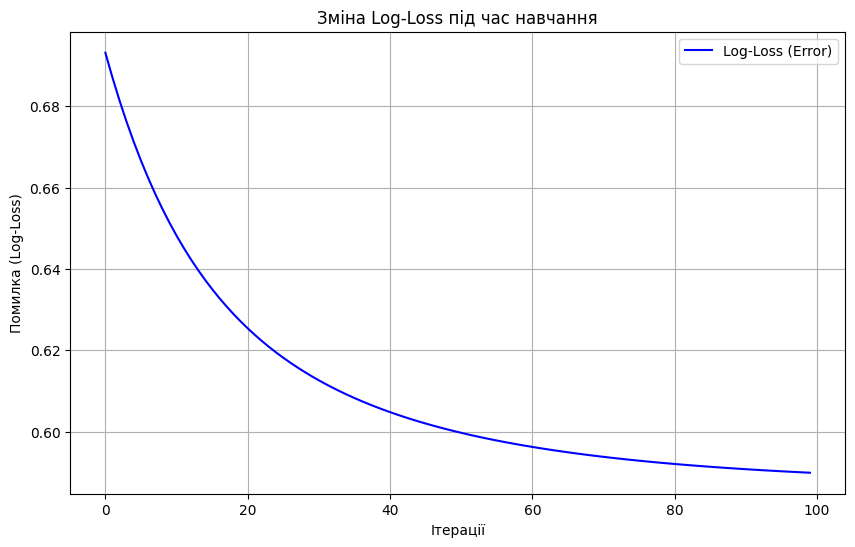

[-0.2893693   0.77655125]


In [ ]:
theta, errors = full_batch_gradient_descent(X_param = X, y_param = y)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(errors, label='Log-Loss (Error)', color='blue')
plt.xlabel('Ітерації')
plt.ylabel('Помилка (Log-Loss)')
plt.title('Зміна Log-Loss під час навчання')
plt.legend()
plt.grid(True)
plt.show()
print(theta)

#### Завдання 5. Обчислення точності моделі

1. Напишіть функцію `predict_proba(theta, X)`, яка використовує знайдені параметри $\theta$ для обчислення ймовірностей належності поточного прикладу з даних до класу $y=1$ на основі значень $\sigma(\theta^T x)$.

2. Напишіть функцію `predict(theta, X, threshold=0.5)`, яка обчислює клас з передбаченої імовірності належності екземпляра до класу 1 з порогом 0.5. Тобто якщо ймовірність менше 0.5, то передбачаємо клас 0, інакше клас 1.

3. Напишіть функцію `accuracy(y_true, y_pred)`, яка обчислює точність моделі, визначивши частку правильно передбачених класів.

  Формула метрики Accuracy:
  $$
  \text{Accuracy} = \frac{\sum_{i=1}^{m} I(\hat{{y}^{(i)}} = y^{(i)})}{m}
  $$

  де $\hat{{y}^{(i)}}$ - передбачене значення класу, $I$ - індикаторна функція (яка дорівнює 1, якщо умова виконується, і 0 - якщо ні), $m$ - кількість прикладів.

4. Обчисліть з використанням даних в завданні 4 $X$, $y$ та обчислених коефіцієнтах $\theta$ та виведіть на екран:
  - передбачені моделлю імовірності належності кожного з екземплярів в матриці `X` до класу 1
  - класи кожного екземпляра з матриці `X`
  - точність моделі.

In [ ]:
def predict_proba(theta_param, X_param):
  y_predict = 1/(1+np.exp(-np.dot(X_param, theta_param.T)))
  return y_predict

probabilities = predict_proba(theta_param=theta, X_param = X)
print(probabilities)

[0.77966809 0.25617965 0.42815828 0.61944235]


In [ ]:
def predict(theta_param, X_param, threshold=0.5):
  y_predict = 1/(1+np.exp(-np.dot(X_param, theta_param.T)))
  y_predict = (y_predict[:]>0.5).astype('int')
  return y_predict

class_predicted = np.array(predict(theta_param=theta, X_param = X))
print(class_predicted)

[1 0 0 1]


In [ ]:
def accuracy(y_true, y_pred):
  m=len(y_pred)
  accuracy = np.sum(y_pred==y_true)/m
  return accuracy

y=np.array([1,0,1,0])
accuracy_score = accuracy(y_true=y, y_pred=class_predicted)
print(f'Accuracy score: {accuracy_score}')

Accuracy score: 0.5


In [ ]:
import pandas as pd
result = np.hstack((X[:,1].reshape(-1,1), y.reshape(-1, 1), probabilities.reshape(-1, 1), predicted_class.reshape(-1, 1)))
df = pd.DataFrame(result, columns=['X','y','probabilities','predicted_class'])
print(df)

     X    y  probabilities  predicted_class
0  2.0  1.0       0.779668              1.0
1 -1.0  0.0       0.256180              0.0
2  0.0  1.0       0.428158              0.0
3  1.0  0.0       0.619442              1.0
